In [1]:
"""
Author: Bryan Bo Cao
Email: boca7588@colorado.edu or bo.cao-1@colorado.edu
Github Repo: https://github.com/BryanBo-Cao/neuralnets-deeplearning
Reference:
    https://github.com/tylersco/deep-neural-networks-art-images
    http://www.scipy-lectures.org/advanced/image_processing/
    
Autoencoder:
700(bottleneck)
"""
from scipy import misc
import scipy
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import glob
import pandas as pd
import csv
import math
from __future__ import division, print_function, absolute_import
from data.img.ArtDataLoader import ArtData
import Plotter
from Plotter import plot_acc_distance
from Plotter import plot_acc_cosine
from Plotter import plot_prob_distance
from Plotter import plot_prob_cosine
from Plotter import plot_2lists
from Plotter import plot_4lists
from MySpearman import get_distance_prob_correlation
from MySpearman import get_cosine_prob_correlation
from MySpearman import get_distance_acc_correlation
from MySpearman import get_cosine_acc_correlation

from scipy.stats import spearmanr

In [2]:
from scipy import misc
art_data = ArtData()
art_data.load_all_data()
#art_data.load_images()
#art_data.load_metadata()

ArtData Initialized!
2592  images loaded!


In [3]:
#print(art_data.train_images.keys())
#Validate
print(art_data.alpha_pairs['same'][0][95])
print(art_data.beta_pairs['same'][0][95])

print(art_data.alpha_pairs['diff'][0][95])
print(art_data.beta_pairs['diff'][0][95])

2018-impressionist-16x16.jpg
2134-impressionist-16x16.jpg
1233-cubist-16x16.jpg
1185-cubist-16x16.jpg


In [4]:
print(art_data.train_images['0001-cubist-16x16.jpg'].shape)

(16, 16, 3)


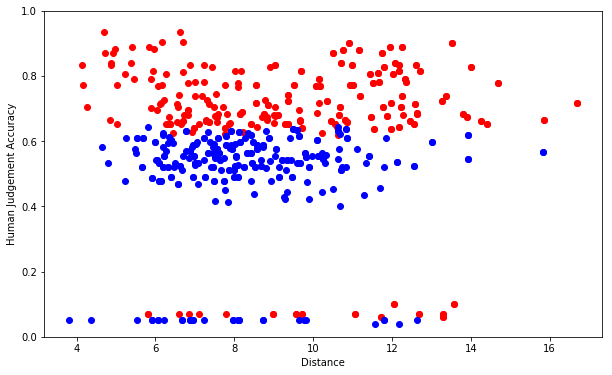

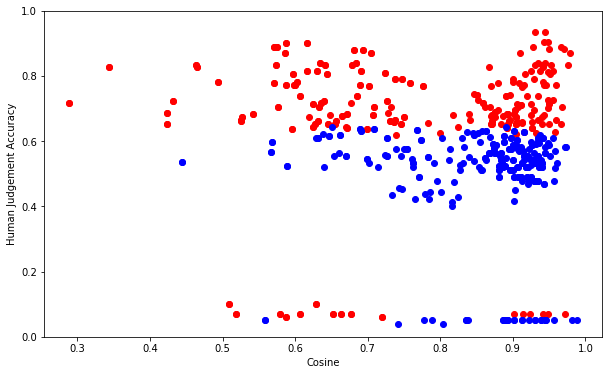

In [5]:
#Raw data - Human Judgement Accuracy
plot_acc_distance(art_data)
plot_acc_cosine(art_data)

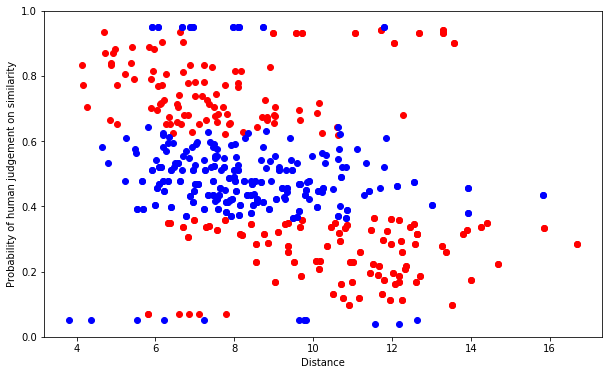

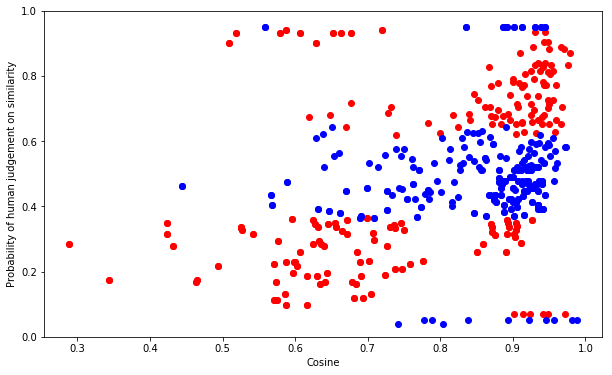

In [6]:
#Raw data - Probability of human judgement on similarity
plot_prob_distance(art_data)
plot_prob_cosine(art_data)

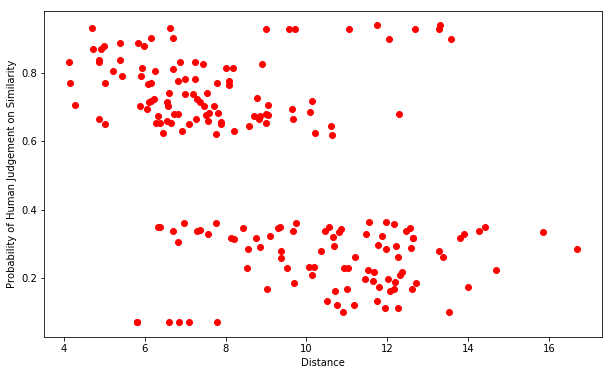

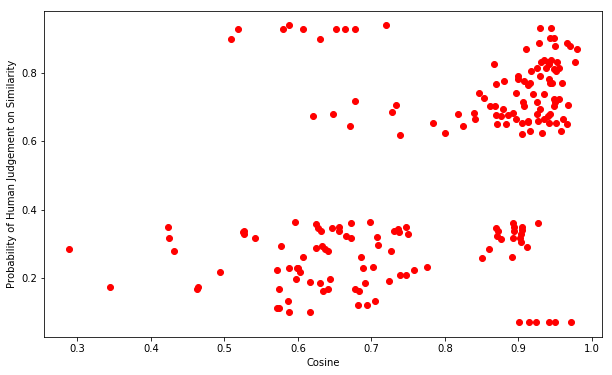

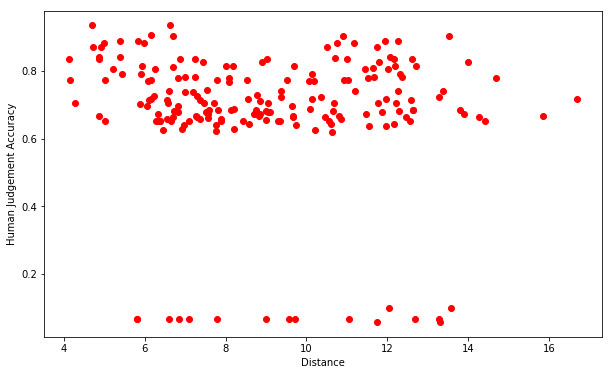

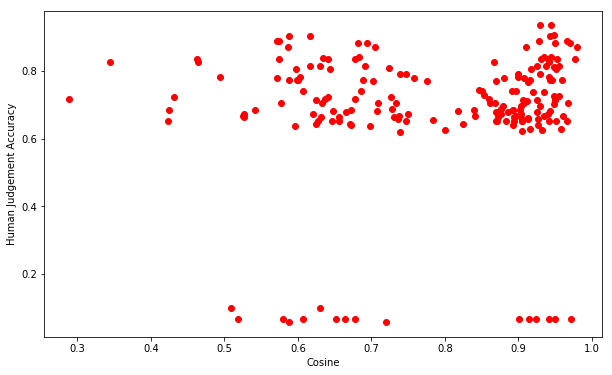

In [7]:
plot_2lists(
    art_data.alpha_set_flatten[3], art_data.alpha_prob_human_similarity,
    "Distance", "Probability of Human Judgement on Similarity")
plot_2lists(
    art_data.alpha_set_flatten[2], art_data.alpha_prob_human_similarity,
    "Cosine", "Probability of Human Judgement on Similarity")
plot_2lists(
    art_data.alpha_set_flatten[3], art_data.alpha_accuracy,
    "Distance", "Human Judgement Accuracy")
plot_2lists(
    art_data.alpha_set_flatten[2], art_data.alpha_accuracy,
    "Cosine", "Human Judgement Accuracy")

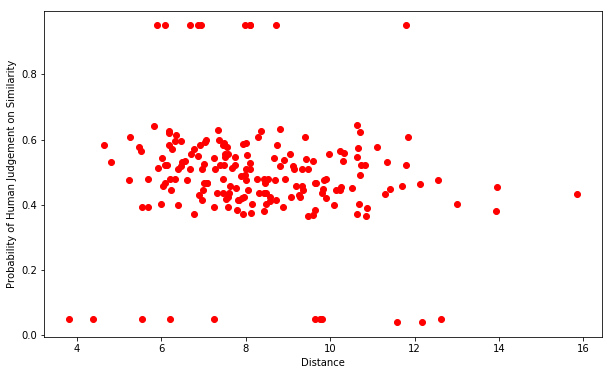

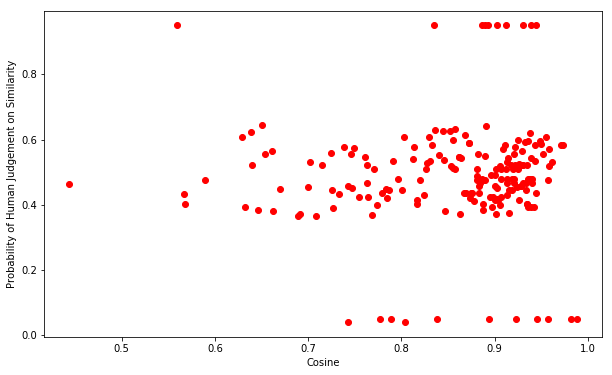

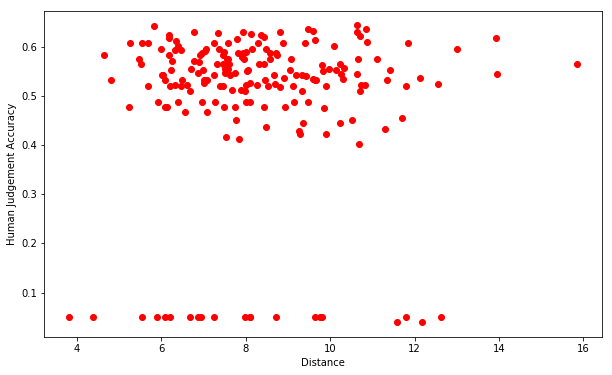

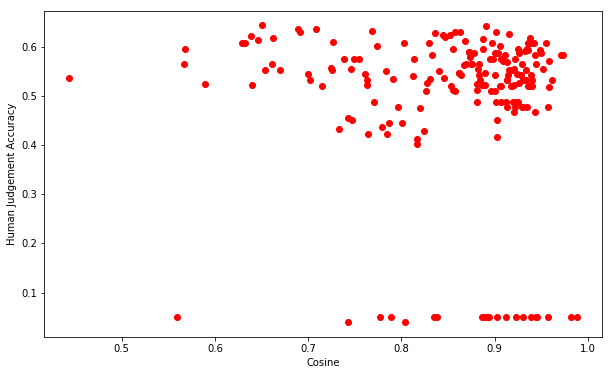

In [8]:
plot_2lists(
    art_data.beta_set_flatten[3], art_data.beta_prob_human_similarity,
    "Distance", "Probability of Human Judgement on Similarity")
plot_2lists(
    art_data.beta_set_flatten[2], art_data.beta_prob_human_similarity,
    "Cosine", "Probability of Human Judgement on Similarity")
plot_2lists(
    art_data.beta_set_flatten[3], art_data.beta_accuracy,
    "Distance", "Human Judgement Accuracy")
plot_2lists(
    art_data.beta_set_flatten[2], art_data.beta_accuracy,
    "Cosine", "Human Judgement Accuracy")

In [9]:
get_distance_prob_correlation(art_data)

SpearmanrResult(correlation=-0.4531196797090763, pvalue=1.6549967874513576e-30)

In [10]:
get_cosine_prob_correlation(art_data)

SpearmanrResult(correlation=0.42701803307779929, pvalue=6.2551843304760119e-27)

In [11]:
get_distance_acc_correlation(art_data)

SpearmanrResult(correlation=0.18460752476813316, pvalue=8.2212500213044036e-06)

In [12]:
get_cosine_acc_correlation(art_data)

SpearmanrResult(correlation=-0.23142047705047938, pvalue=1.9265333564185278e-08)

In [13]:
#alpha distance prob_human_similarity
spearmanr(art_data.alpha_set_flatten[3], art_data.alpha_prob_human_similarity, axis=None)

SpearmanrResult(correlation=-0.50682437694990345, pvalue=6.3375388014004768e-14)

In [14]:
#alpha cosine prob_human_similarity
spearmanr(art_data.alpha_set_flatten[2], art_data.alpha_prob_human_similarity, axis=None)

SpearmanrResult(correlation=0.48579741209802429, pvalue=9.170919427646122e-13)

In [15]:
#alpha distance accuracy
spearmanr(art_data.alpha_set_flatten[3], art_data.alpha_accuracy, axis=None)

SpearmanrResult(correlation=-0.090974395990242998, pvalue=0.20949667614990294)

In [16]:
#alpha cosine accuracy
spearmanr(art_data.alpha_set_flatten[2], art_data.alpha_accuracy, axis=None)

SpearmanrResult(correlation=0.074418100705952839, pvalue=0.3049589242996365)

In [17]:
#beta distance prob_human_similarity
spearmanr(art_data.beta_set_flatten[3], art_data.beta_prob_human_similarity, axis=None)

SpearmanrResult(correlation=-0.20800569779630709, pvalue=0.0037900816572711098)

In [18]:
#beta cosine prob_human_similarity
spearmanr(art_data.beta_set_flatten[2], art_data.beta_prob_human_similarity, axis=None)

SpearmanrResult(correlation=0.097165030226659899, pvalue=0.18000453868270713)

In [19]:
#beta distance accuracy
spearmanr(art_data.beta_set_flatten[3], art_data.beta_accuracy, axis=None)

SpearmanrResult(correlation=-0.022142954014002725, pvalue=0.76047612609549908)

In [20]:
#beta cosine accuracy
spearmanr(art_data.beta_set_flatten[2], art_data.beta_accuracy, axis=None)

SpearmanrResult(correlation=-0.097426113249380761, pvalue=0.17883172509337339)